# Inteligencia artificial
# Clase 11 - Optimizadores

## Comparación de optimizadores

En esta clase volveremos a trabajar con el dataset [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), pero en este caso lo usaremos para mostrar una comparación entre los distintos optimizadores.

Comenzaremos importando el dataset y haciendo un breve pre-procesamiento y visualización de los datos, para luego pasar a la creación del modelo y el ensayo de los distintos optimizadores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

### El dataset

In [2]:
# Cargamos el dataset
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# Evaluamos las shapes de train y test
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
# Especificamos los nombres de cada clase
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

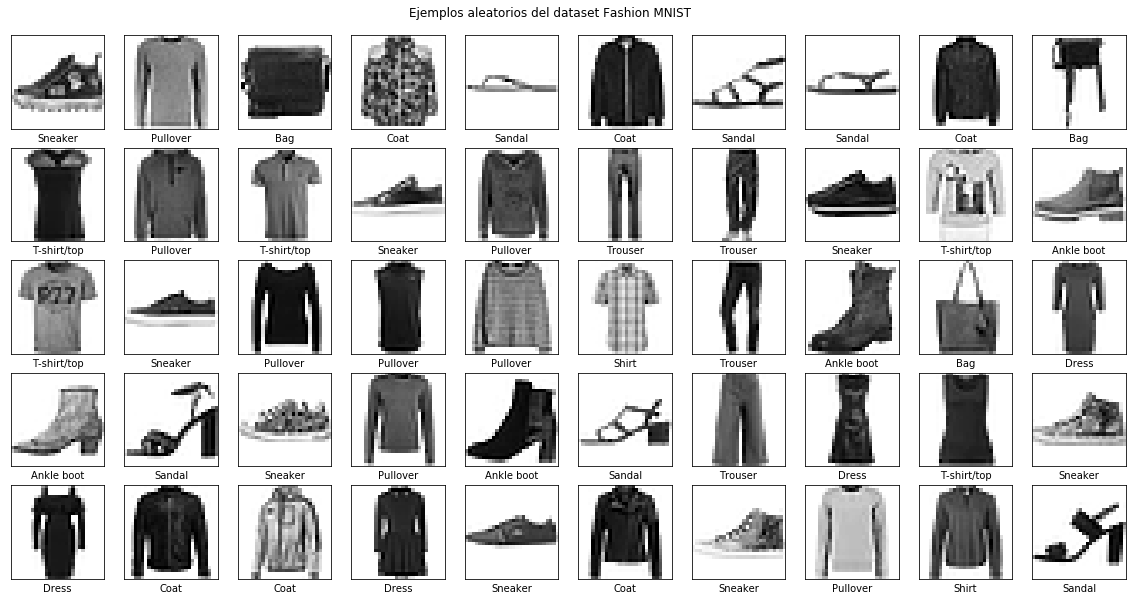

In [5]:
# Visualizamos algunas de las imágenes contenidas en el dataset
plt.figure(figsize=(20, 10))
plt.suptitle('Ejemplos aleatorios del dataset Fashion MNIST', y=0.92)

for i, j in enumerate(np.random.choice(x_train.shape[0], 50)):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[j], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[j]])
plt.show()

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [7]:
x_train = x_train / 255
x_test = x_test / 255

Definiremos también una función que nos ayudará a graficar la evolución del entrenamiento

In [8]:
def plot_history(name, history, legend, plot_val=True):
    fig, ax = plt.subplots(1,2,figsize=(14,6))
    fig.suptitle(name)
    
    if not isinstance(history, list):
        history = [history]
        
    for h in history:
        acc = h.history['acc']
        loss = h.history['loss']
        if plot_val:
            val_loss = h.history['val_loss']
            val_acc = h.history['val_acc']
        epochs = range(1, len(acc) + 1)

        ax[0].set_title('Loss')
        ax[0].set_xticks(ticks=epochs)
        ax[0].set_ylabel('Loss')
        
        ax[0].plot(epochs, loss)
        if plot_val:
            ax[0].plot(epochs, val_loss)
            
        ax[1].set_title('Accuracy')
        ax[1].set_xticks(ticks=list(epochs))
        ax[1].set_xlabel('Epochs')
        ax[1].set_ylabel('Accuracy')
        ax[1].plot(epochs, acc)
        if plot_val:
            ax[1].plot(epochs, val_acc)
        
    ax[0].legend([l+' loss' for l in legend])
    ax[1].legend([l+' accuracy' for l in legend])

### Creación del modelo
Vamos a crear un modelo con 2 capas de 256 neuronas con activación ReLU y una tercer capa que será la de salida con 10 neuronas (una por clase) y activación Softmax.

In [9]:
# Comenzamos importando las clases necesarias
from keras.models import Sequential
from keras.layers import Dense, Flatten

Using TensorFlow backend.


In [47]:
# Instanciamos el modelo
model = Sequential()
model.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Visualizamos el modelo
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Compilación del modelo
Una vez definida la estructura de la red, debemos compilar el modelo indicando el optimizador, la función de costo y la(s) métrica(s) de monitoreo.

Éstas últimas quedan definidas por el tipo de problema que estemos intentando resolver. El optimizador no está tan relacionado al problema (podemos usar el mismo optimizador para regresiones o clasificaciones, no así con la función de costo y las métricas), por lo que no siempre resulta una elección trivial.

Keras tiene un módulo llamado `optimizers` en el que tiene implementaciones de los optimizadores más usados en las que es posible configurar el comportamiento de los mismos mediante los hiperparámetros. 

In [11]:
from keras import optimizers

Hasta ahora veníamos compilando los modelos sin utilizar este módulo gracias a que el argumento `optimizer` del método `.compile()` admite un string como indicador de qué optimizador queremos usar. Si bien esta metodología es cómoda ya que no nos exige importar otro módulo, sólo podemos trabajar con los valores por defecto de los optimizadores. Para hacer un ajuste más fino, debemos instanciar una clase con los hiperparámetros deseados.

### SGD: Stochastic Gradient Descent
Este es el optimizador más simple que podemos utilizar y uno de los primeros en implementarse. El resto de los optimizadores suelen ser variaciones de este.

In [48]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=False)
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
# Guardamos el estado inicial para reutilizarlo más adelante
model.save_weights('initial_weights.h5')

El optimizador SGD hace referencia al método de desenso por el gradiente, pero en la bibliografía también se hace distinción entre _batch_ gradient descent, _mini batch_ gradient descent o _stochastic_ gradient descent dependiendo del tamaño del subset de datos con el que se calcula el gradiente. Para ser coherentes con la nomenclatura de Keras, al tamaño de ese subset lo llamaremos `batch_size`.

Entrenaremos el modelo utilizando SGD como optimizador y probando con distintos batch_size para comparar resultados.

Entrenando con batch_size =  1
Tiempo de entrenamiento: 1208.62 segundos
Entrenando con batch_size =  256
Tiempo de entrenamiento: 7.9 segundos
Entrenando con batch_size =  512
Tiempo de entrenamiento: 5.99 segundos
Entrenando con batch_size =  60000
Tiempo de entrenamiento: 5.04 segundos


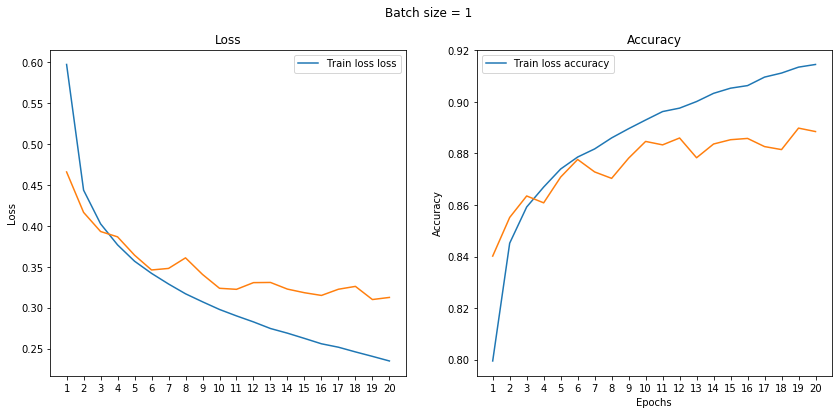

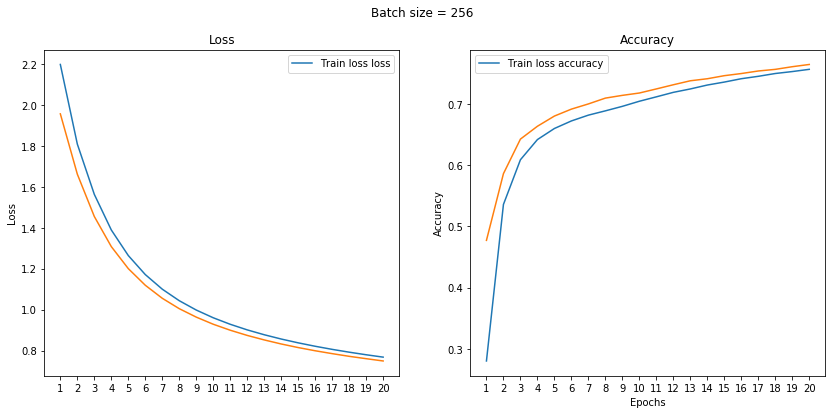

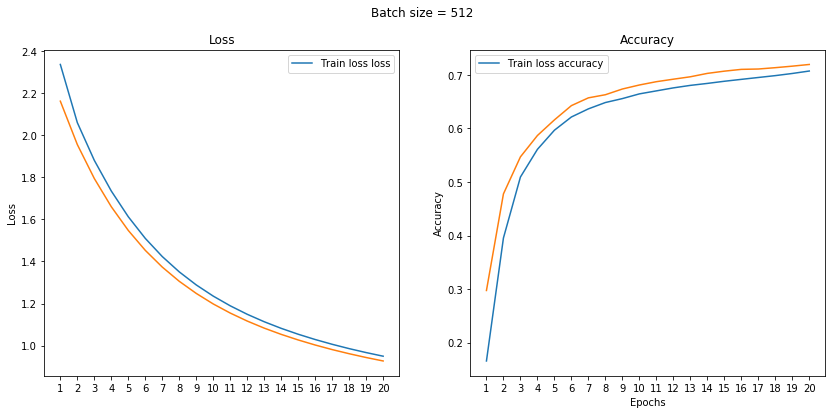

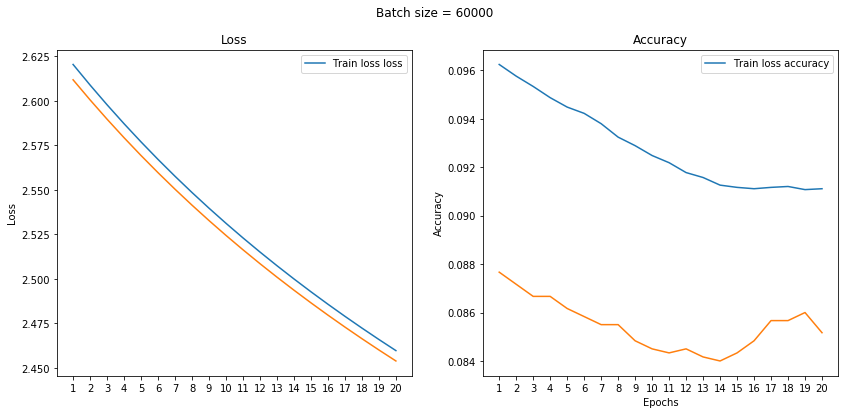

In [13]:
sizes = [1, 256, 512, x_train.shape[0]]
for batch_size in sizes:
    # Reiniciamos los pesos del modelo
    model.load_weights('initial_weights.h5')
    print('Entrenando con batch_size = ', batch_size)
    tic=time.time()
    history=model.fit(x_train, y_train, 
                      batch_size=batch_size, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=0)
    toc=time.time()
    plot_history(f'Batch size = {batch_size}', history, legend=['Train loss'])
    print('Tiempo de entrenamiento:', round(toc-tic, 2), 'segundos')

Cada batch_size tiene sus ventajas y desventajas:
- Si el batch_size = 1, el optimizador realiza un backpropagation por cada muestra y eso es costoso desde el procesamiento. El hecho de hacer una corrección por cada muestra agrega aleatoriedad al descenso y eso contribuye a evitar mínimos locales, pero dificulta la convergencia.
- Si el batch_size es todo el training set, aumentan las chances de que no pueda ser cargado en memoria y lo hace impracticable. El descenso es determinístico una vez seteados los pesos iniciales y eso dificulta evitar un mínimo local.
- Si el batch size es de un tamaño intermedio, se obtiene lo mejor de ambos mundos. Descender de a pequeñas muestras hace que exista cierta aleatoriedad, pero si son lo suficientemente grandes se evitan problemas de convergencia. Es lo mejor desde el procesamiento y la memoria.

### SGD + Momentum

El momentum o _envión_ es un término que se agrega a la actualización de los pesos para que contemple la dirección de la actualización anterior. Debido a la aleatoriedad con la que se generan los mini batches, es más que esperable que la dirección de actualización (es decir, el gradiente) no coincida exactamente mini batch a mini batch y estas diferencias entre los gradientes pueden hacer que el descenso se haga más lento. Al agregar momentum, se compensan las direcciones opuestas y se potencian las coincidentes.

In [49]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False)
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

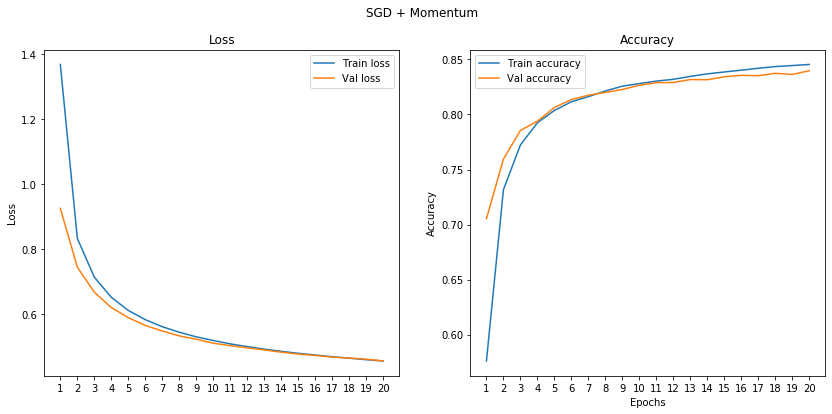

In [50]:
model.load_weights('initial_weights.h5')
momentum_history=model.fit(x_train, y_train, 
                      batch_size=256, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=0)
plot_history('SGD + Momentum', momentum_history, legend=['Train', 'Val'])

### SGD + NAG (Nesterov Accelerated Gradient)

De una manera análoga al momentum, el gradiente acelerado de Nesterov o momentum de Nesterov, considera el ajuste realizado en la iteración anterior. La diferencia está en que el algoritmo de NAG primero actualiza los pesos y después calcula el gradiente. Esto le permite controlar el envión generado por el momentum. Dicho de otra manera:
- Momentum: calculo el gradiente, actualizo los pesos y sumo el envión de iteraciones pasadas
- Nesterov: sigo con el envión de iteraciones pasadas, luego calculo el gradiente y actualizo los pesos 

En azul vemos SGD con Momentum y en verde la resultante de utilizar NAG

![](assets/nesterov_update_vector.png)

In [51]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

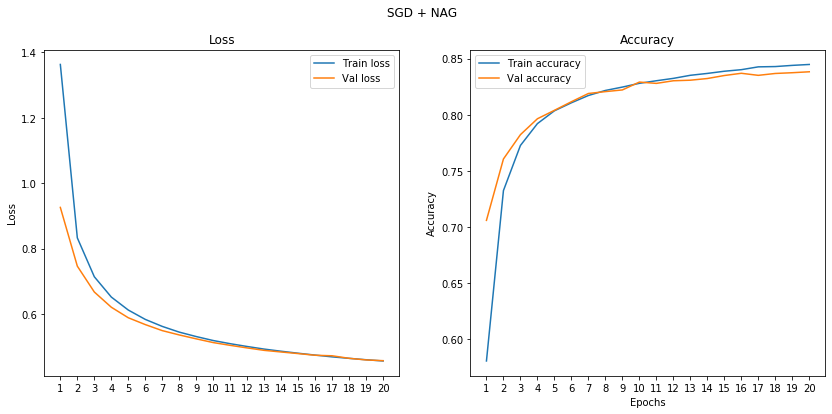

In [52]:
model.load_weights('initial_weights.h5')
nag_history=model.fit(x_train, y_train, 
                      batch_size=256, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=0)
plot_history('SGD + NAG', nag_history, legend=['Train', 'Val'])

### RMSProp

![](assets/RMSProp.png)

El optimizador RMSProp tiene en cuenta la magnitud de los ajustes previos de cada peso (con una media móvil ponderada exponencialmente), para modificar el ajuste de la iteración actual. Esto hace que el entrenamiento responda mejor ante datos dispersos o la presencia de outliers. Podemos encontrar 2 beneficios:
- Si hay muchos datos similares, los pesos a ajustar serán los mismos. Al dividir la magnitud del ajuste por una media móvil de los ajustes anteriores, se frena el avance en esa dirección, teniendo un efecto similar al de regularización.
- Si hay datos que requieran que se ajuste una zona de la red diferente a la de los demás, la media móvil será pequeña y facilitará el ajuste de esos pesos particulares.

In [18]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.RMSprop()
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

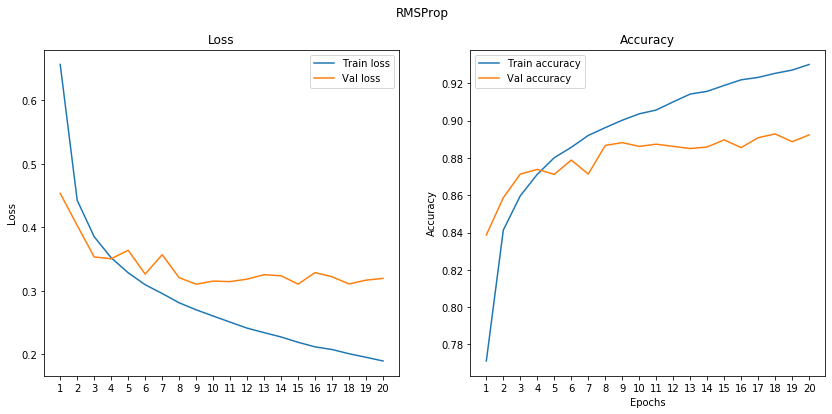

In [19]:
model.load_weights('initial_weights.h5')
rmsprop_history=model.fit(x_train, y_train, 
                      batch_size=256, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=0)
plot_history('RMSProp', rmsprop_history, legend=['Train', 'Val'])

### Adam

El optimizador Adam combina la media móvil ponderada exponencialmente de RMSProp con el Momentum generado por iteraciones anteriores.

![](assets/adam_1.png)

![](assets/adam_2.png)

[Más info](https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c)

In [20]:
# Instanciamos el clasificador con los hiperparámetros
optimizer = optimizers.Adam()
# Compilamos el modelo pasando la instancia
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

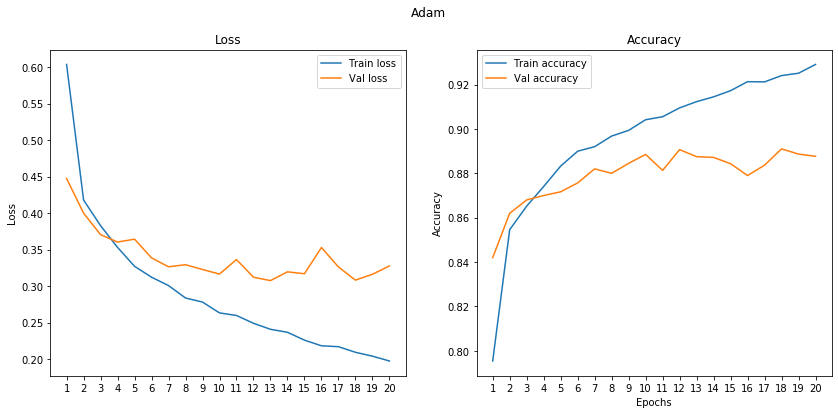

In [21]:
model.load_weights('initial_weights.h5')
adam_history=model.fit(x_train, y_train, 
                      batch_size=256, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=0)
plot_history('Adam', adam_history, legend=['Train', 'Val'])

### Comparación de curvas

Luego de entrenar el mismo modelo, con los mismos datos, los mismos parámetros de entrenamiento y variando únicamente el optimizador, podemos realizar una comparación de las curvas de entrenamiento que obtuvimos.

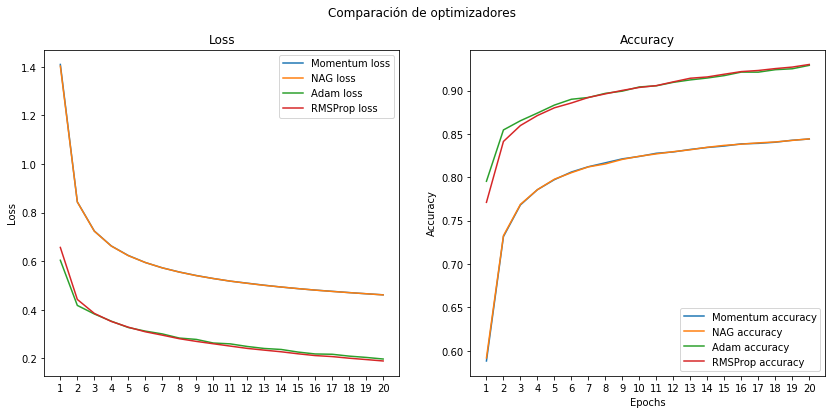

In [44]:
plot_history('Comparación de optimizadores', 
             [momentum_history, nag_history, adam_history, rmsprop_history], 
             plot_val=False, 
             legend=['Momentum', 'NAG', 'Adam', 'RMSProp'])

### Batch Normalization

Para implementar batch normalization, Keras nos ofrece una clase `BatchNormalization` que debemos incluir en la estructura del modelo. Recordemos que batch normalization trabaja con parámetros $\gamma$ y $\beta$ que deben ser aprendidos en el entrenamiento.

Modifiquemos la red para explorar el efecto de agregar batch normalization al modelo.

In [38]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


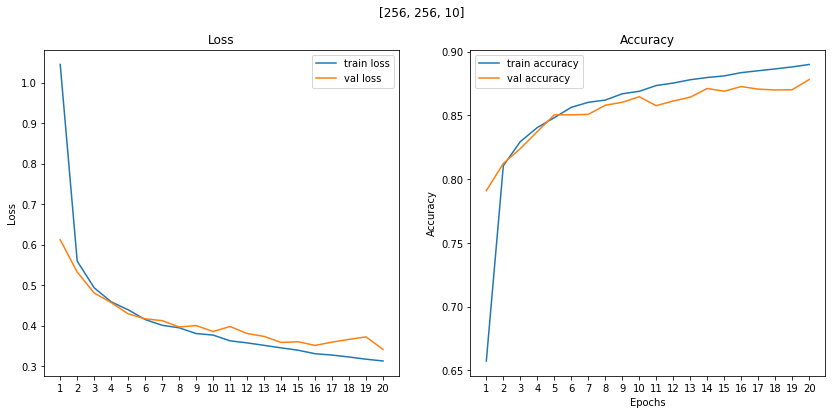

In [39]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.02, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['acc'])
sin_bn_history=model.fit(x_train, y_train, 
                      batch_size=1024, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=0)
plot_history('[256, 256, 10]', sin_bn_history, ['train', 'val'])

Ahora agreguemos las capas de normalización

In [40]:
from keras.layers import BatchNormalization, Activation

In [41]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_6 (Batch (None, 256)               1024      
_________________________________________________________________
activation_6 (Activation)    (None, 256)              

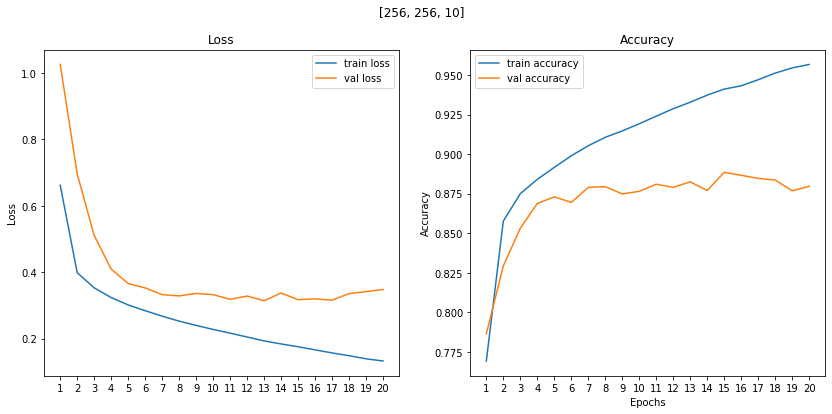

In [42]:
model.compile(optimizer=optimizers.SGD(learning_rate=0.02, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['acc'])
bn_history=model.fit(x_train, y_train, 
                      batch_size=1024, 
                      epochs=20, 
                      validation_split=0.1,
                      verbose=0)
plot_history('[256, 256, 10]', bn_history, ['train', 'val'])

Comparemos las curvas con y sin batch normalization

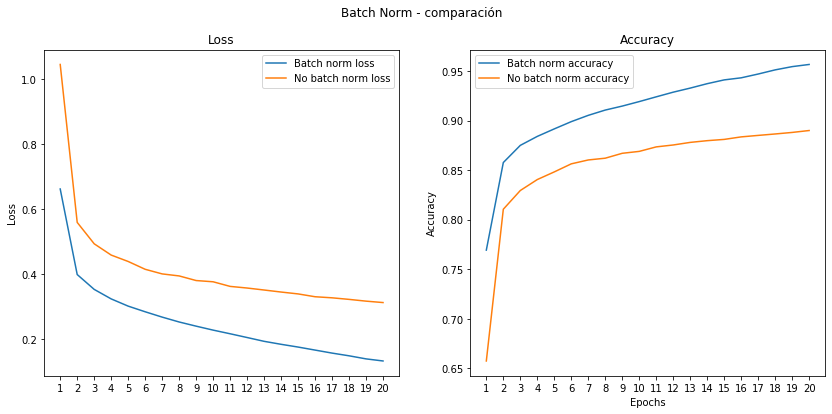

In [43]:
plot_history('Batch Norm - comparación', [bn_history, sin_bn_history], ['Batch norm', 'No batch norm'], plot_val=False)

## Referencias

- [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/)